In [1]:
from scipy.io import loadmat
import h5py
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

In [2]:
filelist = ["calcium_data/140708B_140811a_result", 
            "calcium_data/140909C_141112a_result", 
            "calcium_data/141006C_141121a_result",
            "calcium_data/150109A_150302a_result", 
            "calcium_data/151122A_160202a_result", 
            "calcium_data/151122B_160207a_result", 
            "calcium_data/160209A_160430a_result", 
            "calcium_data/160209B_160428a_result"]

In [3]:
def plot_licks(filename, ax, window=700, sort=True, m_size=10, h_width=50):
    f = h5py.File(filename+".hdf5", "r")
    n_trials = f['data'][:].shape[0]

    if sort:
        inds = np.argsort(f['meta'][:,1])
    else:
        inds = range(n_trials)

    plt.figure(figsize=(10,10))
    for k, i in enumerate(inds):
        d = "#5865D8"
        c = "#676768"
        e = "#AE2626"
        g = "#94A23A"

        valid_ltimes = f['licktimes'][i][f['licktimes'][i]>0]
        ax.scatter(valid_ltimes, np.ones(np.sum(f['licktimes'][i]>0))*k, s=m_size, color=c)

        if f['meta'][i,2] == 1:
            ax.scatter(np.arange(2100,2100+h_width), np.ones(h_width)*k, color=g, s=3, marker="s")
        else:
            ax.scatter(np.arange(2100,2100+h_width), np.ones(h_width)*k, color=e, s=3, marker="s")

        try:
            if valid_ltimes[0] <= window and f['meta'][i,2] == 1:                   #only mark blue if trial is a hit
                ax.scatter([valid_ltimes[0]], [k], s=m_size, color=d)                        #first lick is within window
        except IndexError:
            pass

    ax.axvspan(0, window, alpha=0.1, color='green')
    
    ax.annotate('stimulus',
            xy=(0, n_trials), xycoords='data',
            xytext=(0, 15), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom', color="r")

    #ax.set_xlim=(-250,3000)
    ax.set_ylim(0,n_trials)
    #ax.set_aspect(20)
    
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

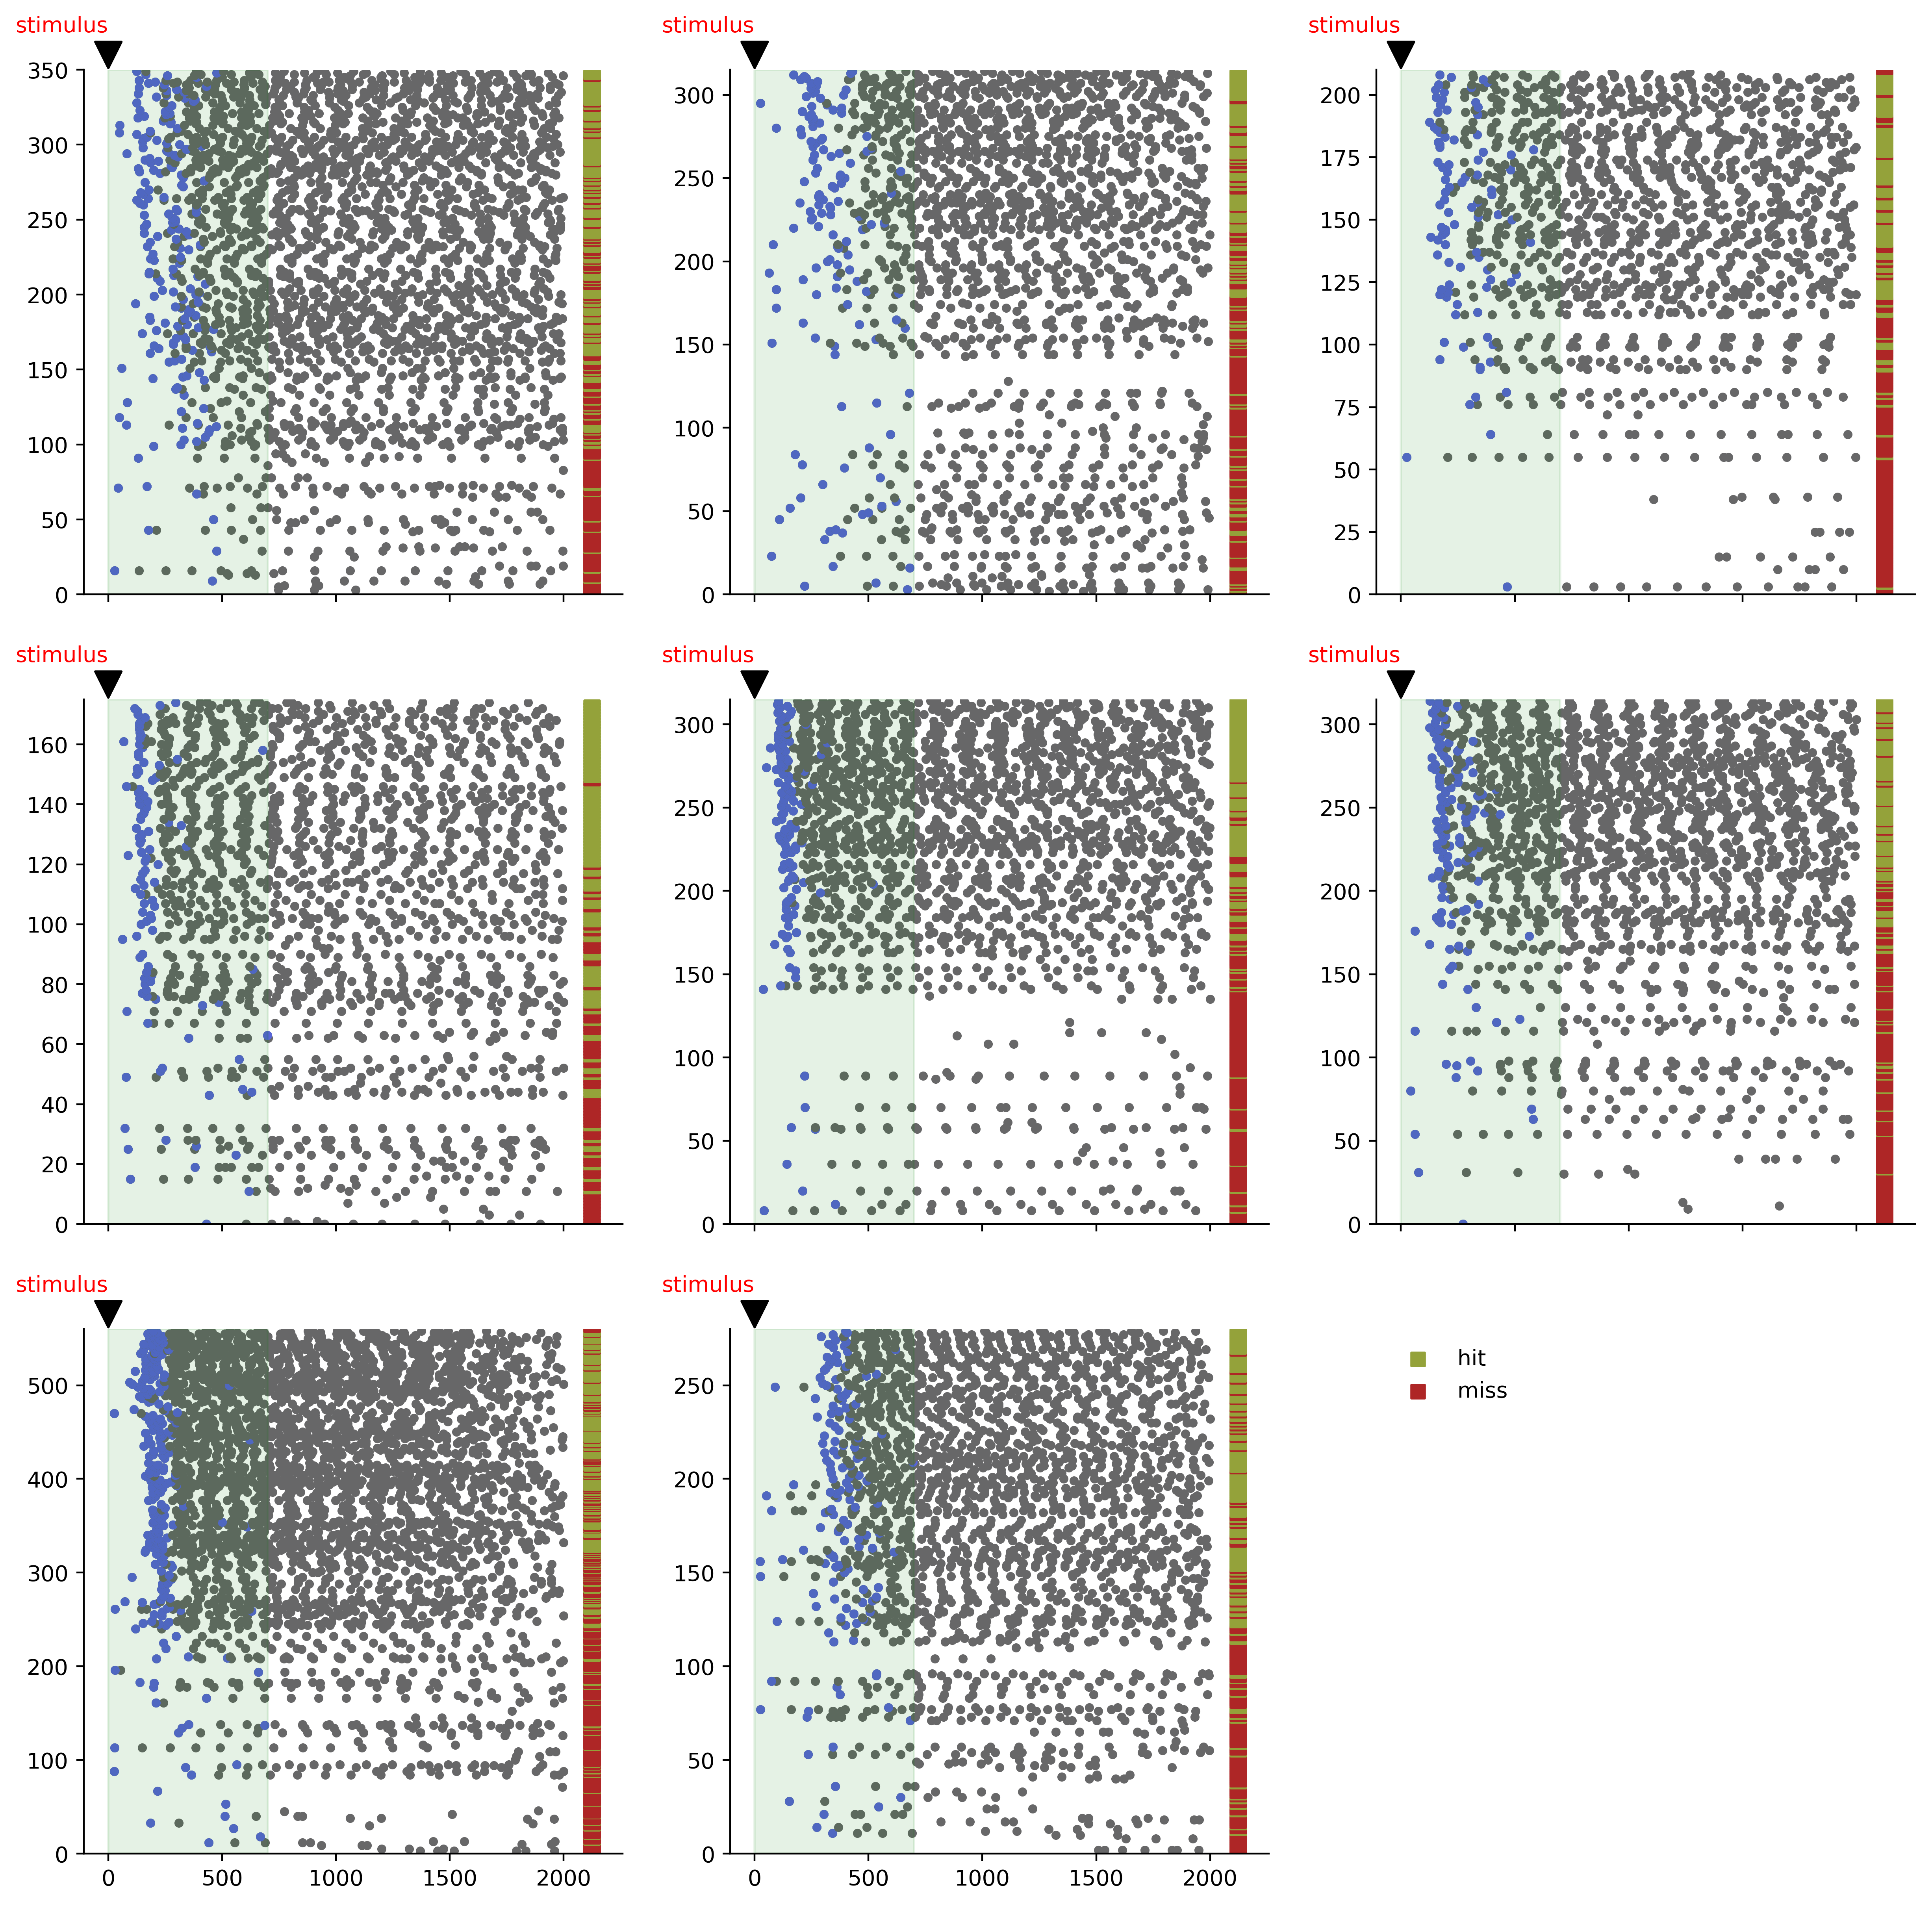

In [4]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, sharex='col', figsize=(15,15), dpi=400)
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
for i in range(8):
    plot_licks(filelist[i], axes[i], window=700, sort=True, h_width=50)
    
ax9.spines["top"].set_visible(False)
ax9.spines["bottom"].set_visible(False)
ax9.spines["right"].set_visible(False)
ax9.spines["left"].set_visible(False)
plt.setp(ax9.get_yticklabels(), visible=False)
ax9.yaxis.set_tick_params(size=0)
ax9.yaxis.tick_left()
plt.setp(ax9.get_xticklabels(), visible=False)
ax9.xaxis.set_tick_params(size=0)

ax9.scatter([], [], color="#94A23A", marker="s", label="hit")
ax9.scatter([], [], color="#AE2626", marker="s", label="miss")
ax9.legend(frameon=False, loc="upper left")

fig.savefig("lickplots.png", dpi=400)